<a href="https://colab.research.google.com/github/meliy-meyada/Tensorflow-Deep-Learning-and-Artificial-Intelligence/blob/main/TF2_0_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# install Tensorflow
!pip install -q tensorflow-gpu==2.8.2
import tensorflow as tf
print(tf.__version__)

2.8.2


In [23]:
# Load in the data
from sklearn.datasets import load_breast_cancer

In [24]:
# Load the data
data = load_breast_cancer()

In [25]:
# Check the type of data
type(data)

sklearn.utils.Bunch

In [26]:
# This basically acts like dictionary key like attributes
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [27]:
# data the attributes means the input data
data.data.shape

(569, 30)

In [28]:
#  target attributes
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [29]:
# their meaning is not lost
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [30]:
# there are also 569 corresponding target
data.target.shape

(569,)

In [31]:
# Determinw meaning of each feature
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [32]:
# Normally put  all import at the top
from sklearn.model_selection import train_test_split

In [33]:
# Split the data intro train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [34]:
# Scale the data
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Alternatively, can do:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy']
              )

# training the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

# Evaluate the model - evaluate() returns loss and accuracy
print("Train score: ", model.evaluate(X_train, y_train))
print("Test score: ", model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 1.3507 - accuracy: 0.3281 - val_loss: 1.2966 - val_accuracy: 0.3351
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 1.2514 - accuracy: 0.3675 - val_loss: 1.2022 - val_accuracy: 0.3670
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 1.1612 - accuracy: 0.4094 - val_loss: 1.1137 - val_accuracy: 0.4149
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0767 - accuracy: 0.4619 - val_loss: 1.0331 - val_accuracy: 0.4521
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.9994 - accuracy: 0.5171 - val_loss: 0.9600 - val_accuracy: 0.4787
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.9322 - accuracy: 0.5459 - val_loss: 0.8921 - val_accuracy: 0.5160
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.8682 - accuracy: 0.5696 - val_loss: 0.8313 - val_accuracy: 0.5638
Epoch 8/100


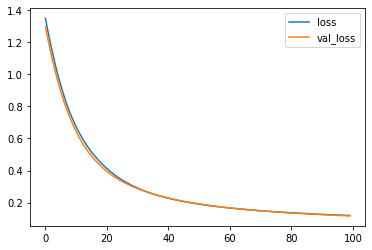

In [37]:
# Plot what's returned by model.fit()

import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

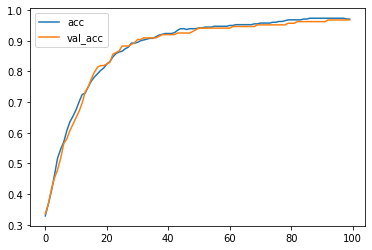

In [38]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

# Making Predictions

In [39]:
# Make predictions
p = model.predict(X_test)
print(p) # They are outputs of the sigmoid, interpreted as probabilities p(y =1 | x)

[[9.06921148e-01]
 [9.94233489e-01]
 [4.56568271e-01]
 [3.31878662e-04]
 [9.65184093e-01]
 [8.96624804e-01]
 [9.78623152e-01]
 [4.61846590e-04]
 [3.34775448e-03]
 [9.26506817e-01]
 [3.00621986e-03]
 [8.38890672e-03]
 [3.77511382e-02]
 [9.07005370e-02]
 [9.78452086e-01]
 [9.17350769e-01]
 [9.46702957e-01]
 [9.91685033e-01]
 [9.96101022e-01]
 [6.13046348e-01]
 [4.91750541e-07]
 [3.89585376e-01]
 [9.83758211e-01]
 [9.98382747e-01]
 [1.66438609e-01]
 [9.06129479e-01]
 [9.22617912e-01]
 [9.02179599e-01]
 [9.86821890e-01]
 [9.35615778e-01]
 [9.95773911e-01]
 [9.82862115e-01]
 [6.38261795e-01]
 [9.92704272e-01]
 [2.15818584e-02]
 [1.23288759e-04]
 [7.54920363e-01]
 [9.93595243e-01]
 [9.33790803e-01]
 [6.79242611e-03]
 [7.62433052e-01]
 [9.86224771e-01]
 [7.95300722e-01]
 [8.76809716e-01]
 [9.95331526e-01]
 [8.65820050e-03]
 [9.92845535e-01]
 [9.99490738e-01]
 [2.63411462e-01]
 [9.92396653e-01]
 [9.87284005e-01]
 [3.11487317e-02]
 [9.97523129e-01]
 [6.37747435e-05]
 [4.85241413e-04]
 [1.171394

In [40]:
# Round to get the actual predictions
import numpy as np
p = np.round(p).flatten()
print(p)

[1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.]


In [41]:
# Calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy: ", np.mean(p == y_test))
print("Evaluate output: ", model.evaluate(X_test, y_test))

Manually calculated accuracy:  0.9680851063829787
6/6 [==============================] - 0s 4ms/step - loss: 0.1167 - accuracy: 0.9681
Evaluate output:  [0.11667805165052414, 0.9680851101875305]
